<a href="https://colab.research.google.com/github/simulate111/Production-Optimization/blob/main/PO_pyomoguide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook explains how to install pyomo and solvers. All installations must be done every time you re-open a notebook and want to run it. Google colab has many packages already installed, which you normally would need to install such as nympy, scipy , matplotlib, plotly, pandas. Most of these also comes with Anaconda (except plotly)

Adding text and code is done with "+ Code" or "+ Text" Sections can easlily be moved or deleted. To run a code you need to press the play buttom that appears when you move the cursor over a code block.

First we install pyomo and solvers using an installation provided by idead (using the %%capture magic to not see what is going on). Since you will need to use
Runtime->Run all if you re-define a pyomo model, we add a try-except construction to the Python code to check if pyomo is already installed. The "!" allows us to run command (as in a terminal).


In [6]:
#install pyomo and solvers from the IDAES proejct
#this installs several solvers like ipopt, cbc, bonmin but takes some time to run
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

Installing pyomo and the cbc solver. We will mainly deal with MILP problem so you may save 10 seconds this way

```
try:
  from pyomo.environ import *
except:
  !pip install -q pyomo
  !apt-get install -y -qq coinor-cbc
```

An alternative solver to CBC is Highs (see https://highs.dev/). This may perform better and can also solve quadratic problems. To install pyomo and Highs you can use the following example. Note, the solver is accessed using some special functions.

```
try:
  import pyomo.environ as pyo
except:
  !pip install pyomo
  !pip install highspy

import pyomo.environ as pyo
from pyomo.contrib.appsi.solvers.highs import Highs
model = pyo.ConcreteModel()
model.x = pyo.Var([1, 2], within=pyo.NonNegativeIntegers)
model.c1 = pyo.Constraint(expr=2 * model.x[1] + 3 * model.x[2] <= 12)
model.c2 = pyo.Constraint(expr=2 * model.x[1] + model.x[2] <= 6)
model.obj = pyo.Objective(expr=5 * model.x[1] + 4 * model.x[2], sense=pyo.maximize)
solver = Highs()
solver.highs_options = {"time_limit": 10}
res = solver.solve(model)  
```

In [7]:
#convenient (but not good Python programming practice)
from pyomo.environ import *
mod=ConcreteModel()



```
#better practice, but add a little extra characters to the code
#if you use this, delete the one above, and also modify the import in the try-section.
import pyomo.environ as pyo
mod = pyo.ConcreteModel() #we now explicitely can see that ConcreteModel is a data structure that is not a part of the Python core

#you then need to write
mod = pyo.ConcreteModel()
mod.pc = pyo.Param(..)
mod.x = pyo.Var(within = pyo.Integer, doc='an integer variabel')
mod.c = pyo.Constraint()
mod.myobjective = pyo.Objective(... sense=pyo.maximize)
solver = pyo.SoverlFactory()

```



Using cbc in colab with a time restriction of 10 s


```
# This is formatted as code
solver = SolverFactory("cbc", executable="/usr/bin/cbc")
solver.options["sec"]=10
results = solver.solve(mod,tee=True)
```





In [8]:
#better practice, but add a little extra characters to the code
#if you use this, delete the one above, and also modify the import in the try-section.
import pyomo.environ as pyo
mod = pyo.ConcreteModel() #we now explicitely can see that ConcreteModel is a function that is not a part of the Python core

In [9]:
#solver = SolverFactory("cbc", executable="/usr/bin/cbc")
solver = SolverFactory("cbc")
solver.options["sec"]=10
results = solver.solve(mod,tee=True)

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Jun  7 2023 

command line - /content/bin/cbc -sec 10 -printingOptions all -import /tmp/tmpoimz1tlp.pyomo.lp -stat=1 -solve -solu /tmp/tmpoimz1tlp.pyomo.soln (default strategy 1)
seconds was changed from 1e+100 to 10
Option for printingOptions changed from normal to all
Presolve 0 (-1) rows, 0 (-1) columns and 0 (-1) elements
Statistics for presolved model


Problem has 0 rows, 0 columns (0 with objective) and 0 elements
There are 22122 singletons with no objective 
Column breakdown:
0 of type 0.0->inf, 0 of type 0.0->up, 0 of type lo->inf, 
0 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0, 0 of type -inf->up, 0 of type 0.0->1.0 
Row breakdown:
0 of type E 0.0, 0 of type E 1.0, 0 of type E -1.0, 
0 of type E other, 0 of type G 0.0, 0 of type G 1.0, 
0 of type G other, 0 of type L 0.0, 0 of type L 1.0, 
0 of type L other, 0 of type Range 0.0->1.0, 0 of type Range other, 
0 of type Free 
Presolve 0 (-1) 

Here are some options for bonmin



```
#
solver = SolverFactory("bonmin")
#if you need to specify path so solver:
solver = SolverFactory("bonmin",executable="/content/bonmin")

#only use one of these (or none, then default, which is B-Hyb)
solver.options["bonmin.algorithm"]="B-BB" #brach&bound
solver.options["bonmin.algorithm"]="B-OA" #outer approximation
solver.options["bonmin.algorithm"]="B-QG" # Quesada and Grossmann's branch-and-cut algorithm
solver.options["bonmin.algorithm"]="B-Hyb" #hybrid outer-approximation based branch-and-cut algorithm

#some other solver options, atleast the time limit on the solver is useful
solver.options["bonmin.time_limit"]=120
solver.options["max_iter"]=50000 #max iterations for ipopt, default 3000

#calling solver, tee=False gives quite output on the progress, you probably want to use tee=True
results = solver.solve(m,tee=False)
```





Other solvers (ipopt and couenne are like bonmin in /content/ becasue they are installed in ste same way in colab. Use of of the following:
```
#
solver = SolverFactory("ipopt",executable="/content/ipopt")
solver = SolverFactory("couenne",executable="/content/couenne")

results = solver.solve(m,tee=False)
```

# Using files with in colab
The colab machine is a virtual machine and created eash time you want to run code in it. This gives some problems when you like to work with files. Here are some options for working with files

1. Upload the files from the notbook with upload. Click on the folder icon to the left to open this view. You can now drag and drop from your own computer

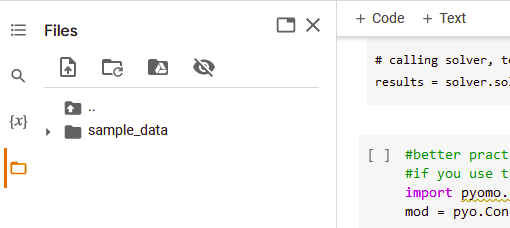

2. Upload files to an active virtual machine with code
```
#this will give you a widget for selecting files to upload, must be done each time you start the virtual machine
from google.colab import files
uploaded = files.upload()
```

3. Have an url to your file and open with the pandas package, works well for excel file.

In this course, the easiest way for you to reach a file via an url, is to upload it to your personal ÅA hope page area. On a windows machine this is easy. Mount this was a drive in windows. The area you should mount is

\\wwwusers.abo.fi\wwwusers\your_username

Then copy the file there and you can read it in. If you have the file in the part you can use:

```
import pandas as pd
df = pd.read_excel('myexelfile.xlsx')
```




An example of a MILP problem (A book shelf packing problem)

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Jun  7 2023 

command line - /content/bin/cbc -printingOptions all -import /tmp/tmpxux8u18v.pyomo.lp -stat=1 -solve -solu /tmp/tmpxux8u18v.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
Presolve 31 (-1) rows, 136 (0) columns and 286 (-1) elements
Statistics for presolved model
Original problem has 136 integers (136 of which binary)
==== 0 zero objective 6 different
31 variables have objective of 1
50 variables have objective of 2
40 variables have objective of 3
5 variables have objective of 4
9 variables have objective of 5
1 variables have objective of 6
==== absolute objective values 6 different
31 variables have objective of 1
50 variables have objective of 2
40 variables have objective of 3
5 variables have objective of 4
9 variables have objectiv

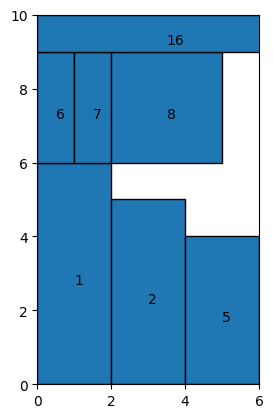

In [10]:

#author: abrink

#Glass cutting (or packing into shelves)
#http://www1.utt.fr/mosim01/pdf/ARTICLE-093.pdf

#Model assumes that all items are sorted in descended height order
#The problem is to have the most valuable shelf, more items
#available than we can fit to the shelf


from pyomo.environ import *
import matplotlib.pyplot as plt
import pandas as pd

#create a dict of unsorted rectangles to choose between
d = {'h': [3,2,4,3,5,2,1,5,3,2,1,5,3,6,3,2], 'w': [3,4,2,1,4,3,3,2,5,5,7,4,1,2,3,4]}

#create a dataframe for sorting etc
df = pd.DataFrame(data=d)
#sort the data in falling height
df = df.sort_values(by=['h'], ascending=False)
#reset the index key
df = df.reset_index(drop=True)

#We create the model object, here called "m"
m=ConcreteModel()

#Create a set of items
m.n = Param(initialize=len([n for n in df.set_index('h').index.values if pd.notnull(n)]),doc='number of items available')
m.itms=RangeSet(m.n)

#Create parameters that defines size and cost of items (as w*h)
#These are picked out from the sorted dataframe
#Name "items" reserved, no mispelling
h={}
w={}
p={}
for j in m.itms:
    h[j]=df.loc[j-1].at['h']
    w[j]=df.loc[j-1].at['w']
    p[j]=h[j]*w[j]

m.h = Param(m.itms,initialize=h,doc='Height of items')
m.w = Param(m.itms,initialize=w,doc='Width of items')
m.p = Param(m.itms,initialize=h,doc='Cost/Profit of items')

m.W = Param(initialize=6,doc='Width of shelf')
m.H = Param(initialize=10,doc='Total height of shelf rack')



#Items cannot be places on a shelf with lower index; we do not need to define these for the variable
#This to prevent mistakes if the objctive is changed.
si = []
for j in m.itms:
    for k in m.itms:
        if k <= j:
            foo_tuple = (j, k)
            si.append(foo_tuple)
m.sparsex=Set(initialize=si,doc='Set with valid j,k index for x')
m.x = Var(m.sparsex,within=Binary,doc='Variable x_jk, true if item j is in shelf number k')

#THe non-sparse version of the variable, contains unneccessary combinations
#m.x = Var(m.itms,m.itms,within=Binary,doc='Variable x_jk, true if item j is in shelf number k')

#Object function, value of picked items. Highest item can only be on lowest shelf,
#second highest on lowest and second lowest and so on. As many shelfs as items possible
m.obj=Objective(expr=sum(m.p[j]*m.x[j,k] for j in m.itms for k in m.itms if k <= j),sense=maximize)

def once_rule(m,j):
    return sum(m.x[j,k] for k in m.itms if k <= j) <= 1
m.once=Constraint(m.itms,rule=once_rule,doc='An item can only be picked once')

def shellwidth_rule(m,k):
    if k < len(m.itms):
        return sum(m.w[j]*m.x[j,k] for j in range(k+1,m.n+1)) <= (m.W-m.w[k])*m.x[k,k]
    else:
        return Constraint.Skip
m.shellw=Constraint(m.itms,rule=shellwidth_rule,doc='Widht of items smaller than available space, item k always first on shelf k')

m.toth=Constraint(expr=sum(m.h[k]*m.x[k,k] for k in m.itms) <= m.H,doc='Hight of used shelf-layers smaller than alowed rack height')

#Specify solver
solver = SolverFactory("cbc")

#Verbous solving
results = solver.solve(m,tee=True)

#Probably clumpsy, need to keep track of the lower left corner of the
#rectangles. Only addition in hight if a new shelf is initialized (xkk=1)
figure, axes = plt.subplots()
th=0
ah=0
for k in m.itms:
    tw=0
    th=th+ah
    ah=0
    for j in m.itms:
        if j >= k and m.x[j,k].value:
            p = plt.Rectangle((tw,th), m.w[j],m.h[j], fill=True,edgecolor='black')
            axes.add_artist(p)
            axes.text(tw+m.w[j]/2, th+m.h[j]/2, j,
                      horizontalalignment='left', verticalalignment='top')
            tw+=m.w[j]
            if j == k:
                ah=m.h[j]

axes.set_aspect(1)

plt.xlim(0,m.W.value)
plt.ylim(0,m.H.value)
plt.show()


In [11]:
m.toth.pprint()

toth : Hight of used shelf-layers smaller than alowed rack height
    Size=1, Index=None, Active=True
    Key  : Lower : Body                                                                                                                                                                                    : Upper : Active
    None :  -Inf : 6*x[1,1] + 5*x[2,2] + 5*x[3,3] + 5*x[4,4] + 4*x[5,5] + 3*x[6,6] + 3*x[7,7] + 3*x[8,8] + 3*x[9,9] + 3*x[10,10] + 2*x[11,11] + 2*x[12,12] + 2*x[13,13] + 2*x[14,14] + x[15,15] + x[16,16] :  10.0 :   True
